In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from random import shuffle
from skimage.io import imread
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

from functions import*

In [2]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = 'DL_course_data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

#creating the sets
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


In [7]:
lr = 0.00001
opt = Adam(learning_rate=lr)
batch_size = 8
n_epochs = 100
base_dense = 16
dr = 0.2
loss_function = 'binary_crossentropy'


In [8]:
def vg_model(img_ch, img_width, img_height):
    #blue layer
    model = Sequential()
    model.add(Conv2D(filters=base_dense, input_shape=(img_width, img_height, img_ch),
    kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    #orange layer
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #purple layer
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #green layer
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #red layer
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *8, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    #dense layer
    model.add(Flatten()) 
    model.add(Dense(64))
    model.add(Dropout(dr))
    model.add(Activation('relu'))
    
    model.add(Dense(64)) 
    model.add(Dropout(dr))
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Dropout(dr))
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    model.add(Dropout(dr))
    model.add(Activation('sigmoid'))
    
    
    model.summary() 
    return model

In [9]:
clf=vg_model(1,img_w, img_h)
clf.compile(loss=loss_function,optimizer = opt,metrics=['binary_accuracy'])
clf_hist=clf.fit(x_train,y_train,batch_size,n_epochs,validation_data=(x_test, y_test))

print("The predicted classes labels are:",clf.predict(x_train))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 128, 128, 16)      160       
_________________________________________________________________
activation_18 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
activation_19 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 64, 64, 32)       

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6930 - binary_accuracy: 0.5050 - val_loss: 0.6930 - val_binary_accuracy: 0.5000
Epoch 12/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6931 - binary_accuracy: 0.5030 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 13/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6931 - binary_accuracy: 0.4990 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 14/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6927 - binary_accuracy: 0.5030 - val_loss: 0.6925 - val_binary_accuracy: 0.5000
Epoch 15/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.6931 - binary_accuracy: 0.5020 - val_loss: 0.6926 - val_binary_accuracy: 0.5000
Epoch 16/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6926 - binary_accuracy: 0.4980 - val_loss: 0.6916 - val_binary_accuracy: 0.5000
Epoch 17/100
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5116 - binary_accuracy: 0.7350 - val_loss: 0.4365 - val_binary_accuracy: 0.8450
Epoch 62/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5276 - binary_accuracy: 0.7180 - val_loss: 0.4746 - val_binary_accuracy: 0.8000
Epoch 63/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5286 - binary_accuracy: 0.7230 - val_loss: 0.4404 - val_binary_accuracy: 0.8450
Epoch 64/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5058 - binary_accuracy: 0.7320 - val_loss: 0.4373 - val_binary_accuracy: 0.8350
Epoch 65/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5243 - binary_accuracy: 0.7290 - val_loss: 0.4475 - val_binary_accuracy: 0.8400
Epoch 66/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5112 - binary_accuracy: 0.7320 - val_loss: 0.4458 - val_binary_accuracy: 0.8550
Epoch 67/100
1000/1000 [=================

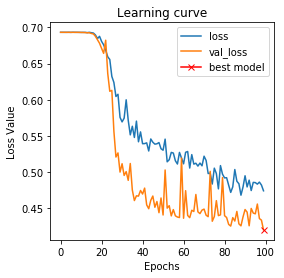

In [10]:
%matplotlib inline

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
 np.min(clf_hist.history["val_loss"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 